In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

from statsmodels.tsa.api import VAR, VARMAX

In [2]:
df = pd.read_csv('alt_data/complete_final_data.csv', parse_dates=['DATE'], index_col=['DATE'])

In [3]:
target = ['target_retail','target_mining_logging', 'target_construction', 'target_edu_health',
       'target_manufacturing', 'target_prof_business', 'target_gov',
       'target_leisure_hospitality']

In [4]:
exog = df.drop(columns=target)
exog

,avg_weeks_unemployed,cont_claims_insur_unemploy,full_employ_level,part_employ_level,not_in_labor_force,gov_unemp_insur,labor_particip_women,labor_particip_men,labor_particip_total,real_estate_loans,...,m1_real,unemp_less_five_weeks,unemp_5_to_14_wks,unemp_15_to_26_wks,unemp_over_27_wks,personal_consum_exp,personal_save_rate,emp_pop_ratio,unemploy_rate,insured_unemploy_rate
DATE,,,,,,,,,,,,,,,,,,,,,
1975-01-01,10.7,3619250.0,85627.0,4133.0,58627.0,12.0,46.3,78.3,61.4,130.0257,...,523.7,3293.0,2646.0,930.0,625.0,975.6,13.2,56.4,8.1,5.500
1975-02-01,11.7,3856500.0,85256.0,3994.0,59214.0,14.0,45.9,78.0,61.0,130.6318,...,522.8,2947.0,2616.0,1124.0,717.0,989.4,12.5,56.1,8.1,5.875
1975-03-01,11.8,4175200.0,85187.0,4087.0,59052.0,16.5,46.2,78.0,61.2,131.1786,...,523.5,3193.0,2630.0,1305.0,769.0,990.6,12.7,56.0,8.6,6.340
1975-04-01,12.9,4473500.0,85189.0,4179.0,59044.0,18.8,46.3,78.1,61.3,131.6391,...,521.1,2915.0,2719.0,1478.0,964.0,995.0,14.2,55.9,8.8,6.750
1975-05-01,13.4,4578200.0,85451.0,3972.0,58820.0,19.6,46.4,78.3,61.5,131.7233,...,525.8,3051.0,2692.0,1554.0,1089.0,1018.9,17.3,56.0,9.0,6.880
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-10-01,21.4,7942600.0,149669.0,6668.0,100207.0,304.3,55.8,67.7,61.6,4680.5019,...,2143.7,2494.0,2341.0,2651.0,3534.0,14627.1,13.1,57.4,6.9,5.400
2020-11-01,23.0,5941750.0,149809.0,6641.0,100548.0,280.8,55.9,67.4,61.5,4667.5872,...,2318.7,2455.0,2404.0,1875.0,3929.0,14532.8,12.5,57.4,6.7,4.050
2020-12-01,23.4,5274750.0,149830.0,6170.0,100663.0,304.3,55.9,67.4,61.5,4659.1834,...,2528.7,2904.0,2222.0,1572.0,3956.0,14451.1,13.5,57.4,6.7,3.600


### Reference: https://towardsdatascience.com/future-price-prediction-beyond-test-data-using-vector-auto-regression-eedb7e0c04e

In [5]:
targets = df[target]

# sc = StandardScaler()
# data_sc = sc.fit_transform(targets)
# df_sc = pd.DataFrame(data_sc, columns=targets.columns, index=targets.index)
df_sc = targets
df_sc

,target_retail,target_mining_logging,target_construction,target_edu_health,target_manufacturing,target_prof_business,target_gov,target_leisure_hospitality
DATE,,,,,,,,
1975-01-01,8518.9,789,3841,5404,17344,6006,14624,5476
1975-02-01,8528.5,790,3718,5421,17004,6002,14747,5484
1975-03-01,8526.7,793,3628,5430,16853,5999,14754,5488
1975-04-01,8492.9,785,3565,5435,16759,5994,14795,5472
1975-05-01,8538.5,799,3552,5468,16746,6022,14827,5502
...,...,...,...,...,...,...,...,...
2020-10-01,15131.8,594,7329,23235,12155,20296,21583,13622
2020-11-01,15129.7,597,7353,23278,12196,20391,21488,13632
2020-12-01,15159.8,597,7400,23249,12231,20550,21456,13134


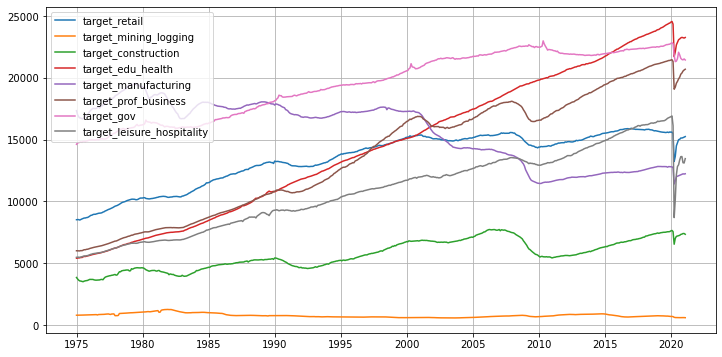

In [6]:
plt.figure(figsize=(12,6))
plt.grid()
plt.plot(df_sc)
plt.legend(df_sc.columns)
plt.show();

In [7]:
def adfuller_test(series, signif=0.05, name='', verbose=False):
    r = adfuller(series, autolag='AIC')
    output = {'test_statistic':round(r[0], 4), 'pvalue':round(r[1], 4), 'n_lags':round(r[2], 4), 'n_obs':r[3]}
    p_value = output['pvalue']
    def adjust(val, length= 6): return str(val).ljust(length)

    print()
    print(f'Augmented Dickey-Fuller Test on "{name}"', "\n   ", '-'*47)
    print(f'Null Hypothesis: Data has unit root. Non-Stationary.')
    print(f'Significance Level = {signif}')
    print(f'Test Statistic = {output["test_statistic"]}')
    print(f'No. Lags Chosen = {output["n_lags"]}')

    for key,val in r[4].items():
      print(f' Critical value {adjust(key)} = {round(val, 3)}')
    
      if p_value <= signif:
         print(f" => P-Value = {p_value}. Rejecting Null Hypothesis.")
         print(f" => Series is Stationary.")
      else:
         print(f" => P-Value = {p_value}. Weak evidence to reject the   Null Hypothesis.")
         print(f" => Series is Non-Stationary.")
    
# ADF test on each column
for name, column in targets.iteritems():
  adfuller_test(column, name = column.name)


Augmented Dickey-Fuller Test on "target_retail" 
    -----------------------------------------------
Null Hypothesis: Data has unit root. Non-Stationary.
Significance Level = 0.05
Test Statistic = -3.1461
No. Lags Chosen = 4
 Critical value 1%     = -3.442
 => P-Value = 0.0233. Rejecting Null Hypothesis.
 => Series is Stationary.
 Critical value 5%     = -2.867
 => P-Value = 0.0233. Rejecting Null Hypothesis.
 => Series is Stationary.
 Critical value 10%    = -2.57
 => P-Value = 0.0233. Rejecting Null Hypothesis.
 => Series is Stationary.

Augmented Dickey-Fuller Test on "target_mining_logging" 
    -----------------------------------------------
Null Hypothesis: Data has unit root. Non-Stationary.
Significance Level = 0.05
Test Statistic = -1.6824
No. Lags Chosen = 10
 Critical value 1%     = -3.442
 => P-Value = 0.4402. Weak evidence to reject the   Null Hypothesis.
 => Series is Non-Stationary.
 Critical value 5%     = -2.867
 => P-Value = 0.4402. Weak evidence to reject the   Null

In [8]:
# differenced train data
data_diff = df_sc.diff()
data_diff.dropna(inplace=True)
print('Glimpse of differenced data:')
print(data_diff.head())

Glimpse of differenced data:
            target_retail  target_mining_logging  target_construction  \
DATE                                                                    
1975-02-01            9.6                    1.0               -123.0   
1975-03-01           -1.8                    3.0                -90.0   
1975-04-01          -33.8                   -8.0                -63.0   
1975-05-01           45.6                   14.0                -13.0   
1975-06-01           44.4                    3.0                -26.0   

            target_edu_health  target_manufacturing  target_prof_business  \
DATE                                                                        
1975-02-01               17.0                -340.0                  -4.0   
1975-03-01                9.0                -151.0                  -3.0   
1975-04-01                5.0                 -94.0                  -5.0   
1975-05-01               33.0                 -13.0                  28.0 

In [9]:
exog_diff = exog.diff()
exog_diff.dropna(inplace=True)
print('Glimpse of differenced data:')
print(exog_diff.head())

Glimpse of differenced data:
            avg_weeks_unemployed  cont_claims_insur_unemploy  \
DATE                                                           
1975-02-01                   1.0                    237250.0   
1975-03-01                   0.1                    318700.0   
1975-04-01                   1.1                    298300.0   
1975-05-01                   0.5                    104700.0   
1975-06-01                   1.9                   -200950.0   

            full_employ_level  part_employ_level  not_in_labor_force  \
DATE                                                                   
1975-02-01             -371.0             -139.0               587.0   
1975-03-01              -69.0               93.0              -162.0   
1975-04-01                2.0               92.0                -8.0   
1975-05-01              262.0             -207.0              -224.0   
1975-06-01              -96.0             -198.0               580.0   

            gov_u

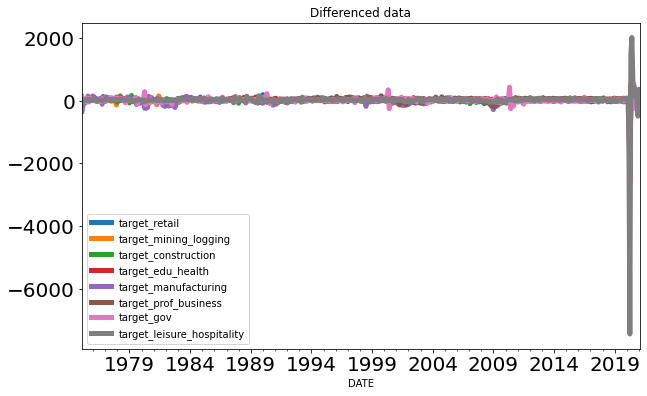

In [10]:
# plotting differenced data
data_diff.plot(figsize=(10,6), linewidth=5, fontsize=20)
plt.title('Differenced data')
plt.show()

In [11]:
# ADF Test on each column
for name, column in data_diff.iteritems():
    adfuller_test(column, name=column.name)


Augmented Dickey-Fuller Test on "target_retail" 
    -----------------------------------------------
Null Hypothesis: Data has unit root. Non-Stationary.
Significance Level = 0.05
Test Statistic = -14.1004
No. Lags Chosen = 3
 Critical value 1%     = -3.442
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.
 Critical value 5%     = -2.867
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.
 Critical value 10%    = -2.57
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.

Augmented Dickey-Fuller Test on "target_mining_logging" 
    -----------------------------------------------
Null Hypothesis: Data has unit root. Non-Stationary.
Significance Level = 0.05
Test Statistic = -5.9219
No. Lags Chosen = 9
 Critical value 1%     = -3.442
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.
 Critical value 5%     = -2.867
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.
 Critical value 10% 

In [12]:
model = VAR(data_diff, exog=exog_diff)

C:\Users\DanielPrestonMc\anaconda3\envs\dsi\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [13]:
res = model.select_order(maxlags=15)

In [14]:
res.summary()

,AIC,BIC,FPE,HQIC
0,56.42,57.89,3.192e+24,57.00
1,55.55,57.53*,1.335e+24,56.32
2,55.06,57.55,8.198e+23,56.03
3,54.94,57.94,7.278e+23,56.11
4,54.59,58.10,5.145e+23,55.96
5,54.50,58.52,4.721e+23,56.07
6,54.23,58.76,3.619e+23,56.00
7,54.07,59.11,3.094e+23,56.04
8,53.69,59.24,2.124e+23,55.86*
9,53.65*,59.71,2.060e+23*,56.02


In [15]:
results = model.fit(maxlags=9, ic='aic')

In [16]:
results.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Fri, 09, Apr, 2021
Time:                     20:47:25
--------------------------------------------------------------------
No. of Equations:         8.00000    BIC:                    59.5999
Nobs:                     544.000    HQIC:                   55.9421
Log likelihood:          -19992.8    FPE:                1.94148e+23
AIC:                      53.5940    Det(Omega_mle):     5.35694e+22
--------------------------------------------------------------------
Results for equation target_retail
                                   coefficient       std. error           t-stat            prob
------------------------------------------------------------------------------------------------
const                                17.092273         5.014460            3.409           0.001
avg_weeks_unemployed                 -1.483469         2.351225           -0.631     

In [17]:
len(results.endog)

553

In [18]:
len(results.exog)

553

In [19]:
nobs = 10 # number of future steps to predict

pred = results.forecast(y=results.endog, steps=nobs, exog_future=results.exog[-nobs:])
pred = pd.DataFrame(pred, columns=df_sc.columns+'_preds')
pred

,target_retail_preds,target_mining_logging_preds,target_construction_preds,target_edu_health_preds,target_manufacturing_preds,target_prof_business_preds,target_gov_preds,target_leisure_hospitality_preds
0,-274.621501,-130.924789,-361.195061,-671.179913,789.998368,-49.564307,-1096.063873,-2934.695635
1,936.661222,-2.951092,646.684916,919.111533,877.017066,968.659542,401.296304,2838.829387
2,457.678308,36.413735,-5.624752,248.043567,671.167664,542.810312,-31.792706,477.492687
3,23.865050,99.167579,52.765118,261.387348,-409.630003,149.491130,535.409471,1382.201739
4,-1.480448,45.411824,48.906943,166.099243,172.591876,375.070856,59.987535,-37.285292
5,487.660570,-37.809635,241.715545,620.725492,425.596816,705.212690,161.529939,2014.131049
6,37.217130,-28.837006,-73.376389,-39.269988,-68.774949,343.560228,-55.679740,-329.402075
7,126.909770,7.826017,262.777893,210.613868,251.981794,306.867768,322.320018,838.638313
8,272.000375,-70.710641,275.302033,157.212588,739.018692,629.492851,-308.577329,-303.911607
9,-142.801642,54.276927,-238.811477,75.807275,-46.149972,-67.326966,285.034705,524.465190


In [20]:
def invert_transformation(pred):
    forecast = pred.copy()
    columns = targets.columns

    for col in columns:
        forecast[col+'_preds'] = forecast[col +'_preds'].cumsum() + targets[col].iloc[-1]

    return forecast

In [21]:
output = invert_transformation(pred)

# Print out whichever target column predictions you want here
output_df = pd.DataFrame(output[['target_retail_preds','target_construction_preds']])
print(output_df)

   target_retail_preds  target_construction_preds
0         14972.578499                6978.804939
1         15909.239721                7625.489855
2         16366.918029                7619.865103
3         16390.783080                7672.630221
4         16389.302631                7721.537164
5         16876.963201                7963.252708
6         16914.180330                7889.876319
7         17041.090100                8152.654212
8         17313.090475                8427.956244
9         17170.288833                8189.144767


In [22]:
d = targets.tail(nobs)

d.reset_index(inplace = True)

In [23]:
d = d.append(pd.DataFrame(
    {'Date': pd.date_range(start = d.DATE.iloc[-1],
        periods = (len(d)+1),
        freq = 'M',
        closed = 'right')
    }))

In [24]:
d.set_index('Date', inplace=True)
d = d.tail(nobs)
output_df.index = d.index
print(output_df)

            target_retail_preds  target_construction_preds
Date                                                      
2021-03-31         14972.578499                6978.804939
2021-04-30         15909.239721                7625.489855
2021-05-31         16366.918029                7619.865103
2021-06-30         16390.783080                7672.630221
2021-07-31         16389.302631                7721.537164
2021-08-31         16876.963201                7963.252708
2021-09-30         16914.180330                7889.876319
2021-10-31         17041.090100                8152.654212
2021-11-30         17313.090475                8427.956244
2021-12-31         17170.288833                8189.144767


In [25]:
# model.predict(test,)

In [26]:
# from sklearn.metrics import mean_squared_error

In [27]:
# forecast = ts_model.forecast(train.values, len(test))

In [28]:
# for i in range(test.shape[1]):
#     print(f'The test MSE on the {test.columns[i]} data is: {round(mean_squared_error(test.values[:, i], forecast[:, i]), 4)}')

In [29]:
# for i in range(test.shape[1]):
#     print(f'The test RMSE on the {test.columns[i]} data is: {round(mean_squared_error(squared=False, y_true=test.values[:, i], y_pred=forecast[:, i]), 4)}')